# **Implementacion de regresión lineal (Refinamiento)**

Michelle Yareni Morales Ramón A01552627

In [ ]:
#librerias
import pandas as pd
import numpy as np
from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score



**Importar datos**

Para este entregable se hizo uso del dataset 'CO2 emissions by vehicles',

Base en kaggle: https://www.kaggle.com/datasets/debajyotipodder/co2-emission-by-vehicles  

Base en el repositorio: https://github.com/michelle-morales/Portafolio-implementacion-IA-1/blob/main/co2_prueba.csv

In [ ]:
#lectura de datos
from google.colab import drive
drive.mount('/content/gdrive')
df=pd.read_csv('/content/gdrive/MyDrive/IA_concentracion/co2_prueba.csv')

Mounted at /content/gdrive


**Descripción del problema**

En este entregable se abordará el mismo problema sobre modelar una relación entre una variable que se quiere predecir, 'CO2 Emissions(g/km)', y alguna variable que influya en ella. Se usó la técnica de regresión lineal, porque se busca establecer una ecuación que mejore el ajuste de los datos y de esta manera poder hacer predicciones o estimaciones. Este entregable específicamente es para refinar el modelo que ya se había implementado anteriormente.

In [ ]:
df.describe()

,Engine Size(L),Cylinders,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
count,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000
mean,3.160068,5.615030,12.556534,9.041706,10.975071,27.481652,250.584699
std,1.354170,1.828307,3.500274,2.224456,2.892506,7.231879,58.512679
min,0.900000,3.000000,4.200000,4.000000,4.100000,11.000000,96.000000
25%,2.000000,4.000000,10.100000,7.500000,8.900000,22.000000,208.000000
50%,3.000000,6.000000,12.100000,8.700000,10.600000,27.000000,246.000000
75%,3.700000,6.000000,14.600000,10.200000,12.600000,32.000000,288.000000
max,8.400000,16.000000,30.600000,20.600000,26.100000,69.000000,522.000000


**Descripción de los datos**

Número de registros: 7385

Total de variables: 12

Cantidad de variables categóricas: 5

Cantidad de variables numéricas: 7

**Variables usadas para implementar la regresión**

Como se trata de una regresión lienal simple se escogieron únicamente dos variables, la predictora y la de salida.

Variable independiente: 'Fuel Consumption Comb (mpg)'. Valores entre 11 y 69.

Variable dependiente: 'CO2 Emissions(g/km)'. Esta es la variable de salida y toma valores entre 96 y 522.

In [ ]:
X = df['Fuel Consumption Comb (mpg)']
y = df['CO2 Emissions(g/km)']

**Separacion de los datos (Train, Test y Validación)**

In [ ]:
X_temp, X_test, y_temp, y_test = train_test_split(X.values.reshape(-1,1), y.values.reshape(-1,1), test_size=0.2, random_state=42)  # 80% entrenamiento, 20% prueba
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.25, random_state=10) # 60% entrenamiento, 20% validación

**Implementacion del modelo**

In [ ]:
model = SGDRegressor(loss='squared_error',alpha=0.00001, l1_ratio=0.5,
                      max_iter=2000, tol=0.01,
                      epsilon=0.2, random_state=6,
                      validation_fraction=0.1, n_iter_no_change=5)
model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SGDRegressor(alpha=1e-05, epsilon=0.2, l1_ratio=0.5, max_iter=2000,
             random_state=6, tol=0.01)

In [ ]:
coef_intercept = model.intercept_  # Intercepto (theta0)
coef_pendiente = model.coef_[0]    # Coeficiente de la variable independiente (theta1)

print(f'Intercepto (theta0): {coef_intercept}')
print(f'Coeficiente (theta1): {coef_pendiente}')

Intercepto (theta0): [456.92199383]
Coeficiente (theta1): -7.818563095527416


**Evaluacion del modelo**

Tanto en el subset de entrenamiento como en el subset de validacion se obtuvo un error muy grande. El MSE es ligeramente mayor en el conjunto de validacion pero el MAE y R2 son casi iguales en ambos conjuntos.

Esto significa que el modelo no esta aprendiendo lo suficiente.

In [ ]:
#subset de entrenamiento
y_train_pred = model.predict(X_train)

mse_train = mean_squared_error(y_train, y_train_pred)

mae_train = mean_absolute_error(y_train, y_train_pred)

r2_train = r2_score(y_train, y_train_pred)


print("subset de entrenamiento")
print(f"MSE en conjunto de entrenamiento: {mse_train:.2f}")
print(f"MAE en conjunto de entrenamiento: {mae_train:.2f}")
print(f"R2 en conjunto de entrenamiento: {r2_train:.2f}")


subset de entrenamiento
MSE en conjunto de entrenamiento: 673.06
MAE en conjunto de entrenamiento: 15.38
R2 en conjunto de entrenamiento: 0.80


In [ ]:
#subset de validacion
y_val_pred = model.predict(X_val)

mse_val = mean_squared_error(y_val, y_val_pred)

mae_val = mean_absolute_error(y_val, y_val_pred)

r2_val = r2_score(y_train, y_train_pred)


print("subset de validacion")
print(f"MSE en conjunto de validacion: {mse_val:.2f}")
print(f"MAE en conjunto de validacion: {mae_val:.2f}")
print(f"R2 en conjunto de validacion: {r2_val:.2f}")


subset de validacion
MSE en conjunto de validacion: 705.93
MAE en conjunto de validacion: 15.47
R2 en conjunto de validacion: 0.80


In [ ]:
#subset prueba
y_test_pred = model.predict(X_test)
mse_test = mean_squared_error(y_test, y_test_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

print("subset de prueba")
print(f"MSE en conjunto de Test: {mse_test:.2f}")
print(f"MAE en conjunto de Test: {mae_test:.2f}")
print(f"R2 en conjunto de Test: {r2_test:.2f}")

subset de prueba
MSE en conjunto de Test: 720.42
MAE en conjunto de Test: 15.88
R2 en conjunto de Test: 0.79


**Validación**



In [ ]:
best_mse = float('inf')
best_model = None
best_parameters = None

#dataframe donde se guardaran los resultados de cada iteracion
resultados_df = pd.DataFrame(columns=['Alpha', 'Loss Function', 'Max Iter', 'MSE'])

#parametros a probar
alphas = [0.0001, 0.01, 0.1, 0.5]
loss_functions = ['squared_error', 'huber', 'epsilon_insensitive', 'squared_epsilon_insensitive']
max_iters = [1000, 5000, 10000]

#ciclo para probar los diferentes parametros
for alpha in alphas:
    for loss_function in loss_functions:
        for max_iter in max_iters:
            model = SGDRegressor(alpha=alpha, loss=loss_function, max_iter=max_iter)
            model.fit(X_train, y_train) #entrenamiento del modelo
            y_pred = model.predict(X_val) #evaluar con subset de validacion
            mse = mean_squared_error(y_val, y_pred)
            resultados_df = resultados_df.append({'Alpha': alpha, 'Loss Function': loss_function, 'Max Iter': max_iter, 'MSE': mse}, ignore_index=True)
            if mse < best_mse:
                best_mse = mse
                best_model = model
                best_parameters = {'alpha': alpha, 'loss': loss_function, 'max_iter': max_iter}

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
<ipython-input-22-9b0f8f1e08f0>:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  resultados_df = resultados_df.append({'Alpha': alpha, 'Loss Function': loss_function, 'Max Iter': max_iter, 'MSE': mse}, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
<ipython-input-22-9b0f8f1e08f0>:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat ins

In [ ]:
resultados_df

,Alpha,Loss Function,Max Iter,MSE
0,0.0001,squared_error,1000,622.254302
1,0.0001,squared_error,5000,1224.261728
2,0.0001,squared_error,10000,995.758427
3,0.0001,huber,1000,13595.776820
4,0.0001,huber,5000,13622.611876
5,0.0001,huber,10000,13639.176991
6,0.0001,epsilon_insensitive,1000,3123.078025
7,0.0001,epsilon_insensitive,5000,691.524165
8,0.0001,epsilon_insensitive,10000,710.148349
9,0.0001,squared_epsilon_insensitive,1000,665.100946


In [ ]:
print("Mejores hiperparámetros:", best_parameters)

Mejores hiperparámetros: {'alpha': 0.5, 'loss': 'squared_error', 'max_iter': 1000}


**Mejores hiperparametros**

Los resultados de cada iteración se guardaron en un dataset para comprobar que efectivamente se estuviera eligiendo los parametros que dminimizaran el error en el set de validación. Los parametros elegidos son:

- alpha: 0.5
- loss: 'squared_error'
- max_iter: 1000

**Cambios de hiperparametros**

In [ ]:
from sklearn.linear_model import LinearRegression
model1 = SGDRegressor(loss='squared_error',alpha=0.5, l1_ratio=0.5,
                      max_iter=1000, tol=0.01,
                      epsilon=0.2, random_state=6,
                      validation_fraction=0.1, n_iter_no_change=5)
#model1 = LinearRegression()
model1.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SGDRegressor(alpha=0.5, epsilon=0.2, l1_ratio=0.5, random_state=6, tol=0.01)

In [ ]:
#subset de entrenamiento
y_train_pred = model1.predict(X_train)

mse_train = mean_squared_error(y_train, y_train_pred)

mae_train = mean_absolute_error(y_train, y_train_pred)

r2_train = r2_score(y_train, y_train_pred)


print("subset de entrenamiento")
print(f"MSE en conjunto de entrenamiento: {mse_train:.2f}")
print(f"MAE en conjunto de entrenamiento: {mae_train:.2f}")
print(f"R2 en conjunto de entrenamiento: {r2_train:.2f}")

subset de entrenamiento
MSE en conjunto de entrenamiento: 697.32
MAE en conjunto de entrenamiento: 15.94
R2 en conjunto de entrenamiento: 0.80


In [ ]:
#subset de validacion
y_val_pred = model1.predict(X_val)

mse_val = mean_squared_error(y_val, y_val_pred)

mae_val = mean_absolute_error(y_val, y_val_pred)

r2_val = r2_score(y_train, y_train_pred)


print("subset de validacion")
print(f"MSE en conjunto de validacion: {mse_val:.2f}")
print(f"MAE en conjunto de validacion: {mae_val:.2f}")
print(f"R2 en conjunto de validacion: {r2_val:.2f}")

subset de validacion
MSE en conjunto de validacion: 725.26
MAE en conjunto de validacion: 16.07
R2 en conjunto de validacion: 0.80


In [ ]:
#subset prueba
y_test_pred = model1.predict(X_test)
mse_test = mean_squared_error(y_test, y_test_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

print("subset de prueba")
print(f"MSE en conjunto de Test: {mse_test:.2f}")
print(f"MAE en conjunto de Test: {mae_test:.2f}")
print(f"R2 en conjunto de Test: {r2_test:.2f}")

subset de prueba
MSE en conjunto de Test: 736.19
MAE en conjunto de Test: 16.36
R2 en conjunto de Test: 0.79


**Observaciones**

En el set de prueba el error MSE aumentó con estos nuevos hiperparámetros pero no fue un cambio considerable, así que el modelo quedó casi igual que al inicio por lo que se probará hacer una regresión de segundo grado, pero antes se analizará el sesgo, varianza y nivel de ajuste del modelo.

**Diagnostico del grado de bias o sesgo**

En la grafica se observa que los datos no se ajustan a la linea de la regresion lo que indica que hay underfiting y por lo tanto hay sesgo. Otra forma de ver el sesgo es porque hay varias regiones donde el error es muy grande y esto indica un sesgo alto.

In [ ]:
y_train_pred = model1.predict(X_train)
y_test_pred = model1.predict(X_test)


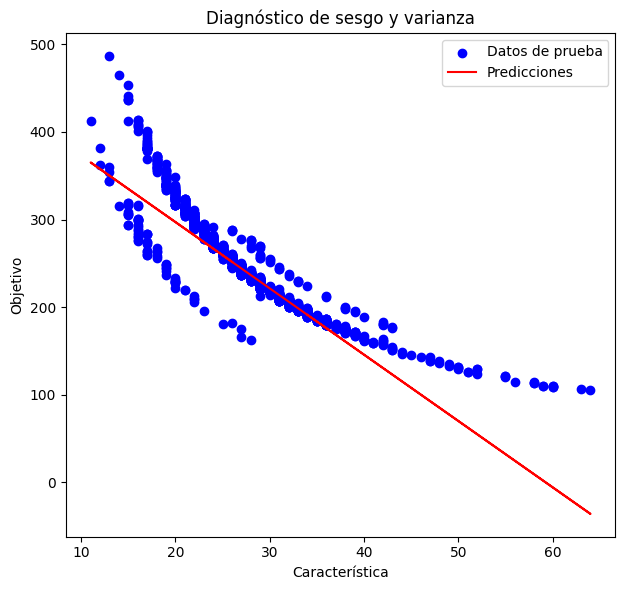

In [ ]:
# Gráfico de diagnóstico de Bias (Sesgo)
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 2)
plt.scatter(X_test, y_test, label='Datos de prueba', color='b')
plt.plot(X_test, y_test_pred, label='Predicciones', color='r')
plt.xlabel('Característica')
plt.ylabel('Objetivo')
plt.title('Diagnóstico de sesgo y varianza')
plt.legend()

plt.tight_layout()
plt.show()





**Diagnóstico de varianza**

En las curvas de aprendizaje se observa que aunque cambie el tamaño del conjunto de Train el error se mantiene estable, de hecho practicamente no cambia nada lo que indica que la varianza en los datos es muy baja.

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

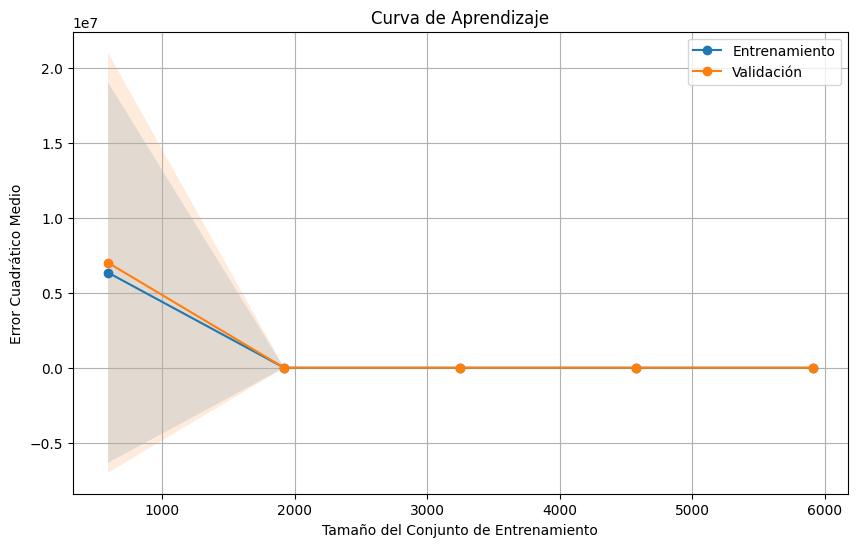

In [ ]:
#curvas de aprendizaje

from sklearn.model_selection import learning_curve
train_sizes, train_scores, test_scores = learning_curve(model1, X.values.reshape(-1,1), y.values.reshape(-1,1), cv=5, scoring='neg_mean_squared_error')

# Calcular las medias y desviaciones estándar de los puntajes
train_mean = -np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = -np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Crear el gráfico de curvas de aprendizaje
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, label='Entrenamiento', marker='o', linestyle='-')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.15)
plt.plot(train_sizes, test_mean, label='Validación', marker='o', linestyle='-')
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.15)
plt.xlabel('Tamaño del Conjunto de Entrenamiento')
plt.ylabel('Error Cuadrático Medio')
plt.legend()
plt.title('Curva de Aprendizaje')
plt.grid(True)
plt.show()

**Diagnostico del nivel de ajuste del modelo**

De acuerdo a lo obtenido en la validacion del error del modelo y en la siguiente gráfica podríamos concluir que el modelo tiene undefiting ya que no se ajustan bien los datos reales a las predicciones.

In [ ]:
# Gráfico de diagnóstico de Bias (Sesgo)
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 2)
plt.scatter(X_test, y_test, label='Datos de prueba', color='b')
plt.plot(X_test, y_test_pred, label='Predicciones', color='r')
plt.xlabel('Característica')
plt.ylabel('Objetivo')
plt.title('Diagnóstico de sesgo y varianza')
plt.legend()

plt.tight_layout()
plt.show()

# **Segundo modelo**

Debido que el modelo lineal practicamente no mejoró con el cambio de hiperparámetros y que los datos parecen tener un comportamniento en forma de curva, se decidió hacer una regresión polinómica de segundo grado.

**Regularización**

La regularización se usa principalmente en modelos lineales para evitar el sobreajuste, pero en regresiones de segundo grado, como es este caso, no es necesario aplicar regularización, ya que esto consiste en incluir términos cuadráticos y el modelo ya los incluye.

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
#from sklearn.linear_model import Ridge

**Implementacion de modelo de segundo grado**

In [ ]:
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)
X_val_poly = poly.transform(X_val)

model2 = LinearRegression()
model2.fit(X_train_poly, y_train)

LinearRegression()

**Evaluación del modelo**

In [ ]:
#subset train
y_train_pred = model2.predict(X_train_poly)
mse_train = mean_squared_error(y_train, y_train_pred)
mae_train = mean_absolute_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)

print("subset de train")
print(f"MSE en conjunto de train: {mse_train:.2f}")
print(f"MAE en conjunto de train: {mae_train:.2f}")
print(f"R2 en conjunto de train: {r2_train:.2f}")

subset de train
MSE en conjunto de train: 422.52
MAE en conjunto de train: 10.81
R2 en conjunto de train: 0.88


In [ ]:
#subset train
y_val_pred = model2.predict(X_val_poly)
mse_val = mean_squared_error(y_val, y_val_pred)
mae_val = mean_absolute_error(y_val, y_val_pred)
r2_val = r2_score(y_val, y_val_pred)

print("subset de validacion")
print(f"MSE en conjunto de validacion: {mse_val:.2f}")
print(f"MAE en conjunto de validacion: {mae_val:.2f}")
print(f"R2 en conjunto de validacion: {r2_val:.2f}")

subset de validacion
MSE en conjunto de validacion: 403.82
MAE en conjunto de validacion: 10.56
R2 en conjunto de validacion: 0.88


In [ ]:
#subset prueba
y_test_pred = model2.predict(X_test_poly)
mse_test = mean_squared_error(y_test, y_test_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

print("subset de test")
print(f"MSE en conjunto de test: {mse_test:.2f}")
print(f"MAE en conjunto de test: {mae_test:.2f}")
print(f"R2 en conjunto de test: {r2_test:.2f}")

subset de test
MSE en conjunto de test: 434.67
MAE en conjunto de test: 11.09
R2 en conjunto de test: 0.87


**Diagnostico de sesgo o bias**

En este modelo, con regresión de segundo grado, los datos parecen ajustarse mejor a la curva pero hay regiones donde aún hay errores notorios, por lo que el modelo tiene sesgo medio.

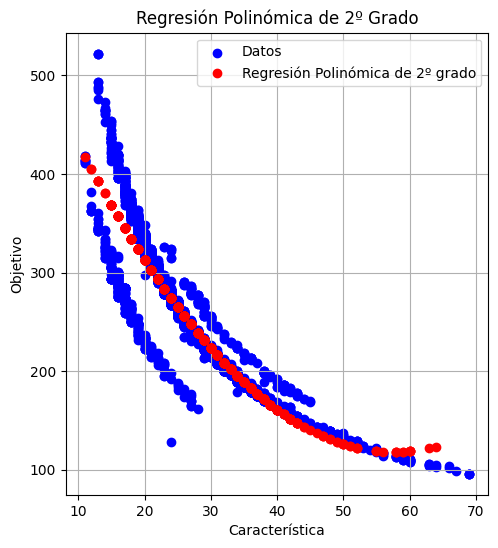

In [ ]:
y_test_pred = model2.predict(X_test_poly)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 2)
#X.values.reshape(-1, 1)
plt.scatter(X.values.reshape(-1, 1), y, label='Datos', color='b')
plt.plot(X_test, y_test_pred, label='Regresión Polinómica de 2º grado', color='r',marker='o', linestyle='',)
plt.xlabel('Característica')
plt.ylabel('Objetivo')
plt.legend()
plt.title('Regresión Polinómica de 2º Grado')
plt.grid(True)
plt.show()




**Curvas de aprendizaje**

Al igual que antes, en la curva de aprendizaje vemos que el error parece estabilizarse en cierto punto sin importar el tamaño del conjunto de Train por lo que la varianza sigue siendo baja.

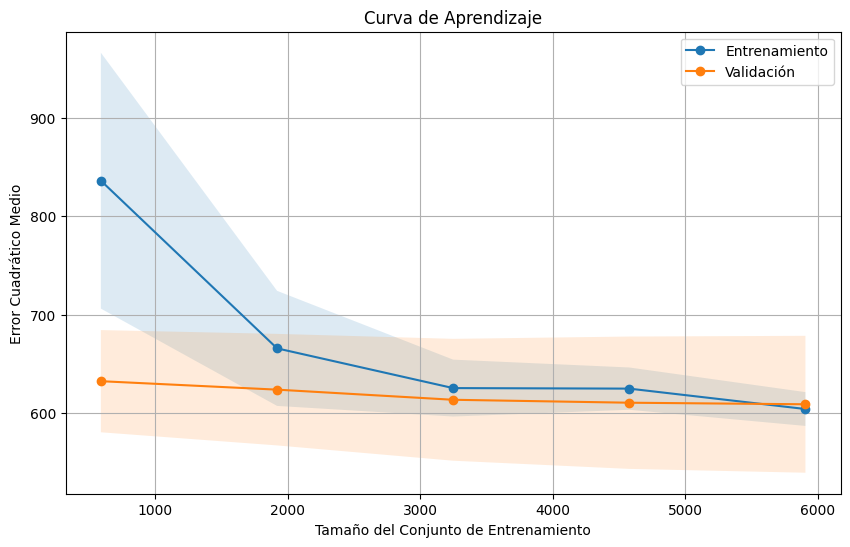

In [ ]:
#curvas de aprendizaje

from sklearn.model_selection import learning_curve
train_sizes, train_scores, test_scores = learning_curve(model2, X.values.reshape(-1,1), y.values.reshape(-1,1), cv=5, scoring='neg_mean_squared_error')

# Calcular las medias y desviaciones estándar de los puntajes
train_mean = -np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = -np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Crear el gráfico de curvas de aprendizaje
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, label='Entrenamiento', marker='o', linestyle='-')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.15)
plt.plot(train_sizes, test_mean, label='Validación', marker='o', linestyle='-')
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.15)
plt.xlabel('Tamaño del Conjunto de Entrenamiento')
plt.ylabel('Error Cuadrático Medio')
plt.legend()
plt.title('Curva de Aprendizaje')
plt.grid(True)
plt.show()

**Diagnostico del nivel de ajuste del modelo**

El error MSE si disminuyo considerablemente, pero sigue siendo algo grande, sin embargo en la gráfica se observa que los datos se ajustan mucho mejor a la curva por lo que podriamos decir que el modelo si está aprendiendo de mejor manera y esto significa que si tiene fiting.

In [ ]:
y_test_pred = model2.predict(X_test_poly)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 2)
#X.values.reshape(-1, 1)
plt.scatter(X.values.reshape(-1, 1), y, label='Datos', color='b')
plt.plot(X_test, y_test_pred, label='Regresión Polinómica de 2º grado', color='r',marker='o', linestyle='',)
plt.xlabel('Característica')
plt.ylabel('Objetivo')
plt.legend()
plt.title('Regresión Polinómica de 2º Grado')
plt.grid(True)
plt.show()

**Conclusiones:**

El segundo modelo tuvo mejor desempeño que el primero, ya que se usó una regresion de segundo grado. Los datos se ajustaron mejor a la curva y el error disminuyó.